<a href="https://colab.research.google.com/github/Kandeo/Housing-Predictive-Model/blob/main/Group_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREDIT CARD CUSTOMER ATTRITION PREDICTION**

**OVERVIEW** 

Customer attrition is defined as the loss of customers by a business. It is one of the most important concerns to any business with customers.
Credit card attrition generally has a negative impact on the company's revenue. Apart from this, the cost of retaining an existing customer is far less that of acquiring a new one.

Due to this, companies seek to develop means to predict potential customers to churn. With the use of this predictive model, possible churners in a business can be identified, and actions taken to prevent them from leaving.

This research therefore aims to analyze factors that increase customer churning and develop a churn prediction model that assists the business  to predict customers who are most likely to churn.

Other objectives include:
- Understanding the influence a customer's demographic Information has on attrition.
- Analyzing the relationship between customer churn and credit card limit.
- Analyzing the influence the number of times a customer has contacted the company has to attrition.
- Determining features that have the highest impact on customer attrition.
- Finding whether the number of months on book affects churning rate.
- Analyzing the effect a customer's card category has on churning.
- The effect a customer being inactive has on churning.
Understanding the relationship transaction amount has with attrition.



Dataset: [Credit Card Customers](https://www.kaggle.com/sakshigoyal7/credit-card-customers)


**DEFINING THE QUESTION**

**Specific Data Analytics Question**

Understanding the characterisitcs of users that are likely to churn and using that knowledge to build a model capable of predicting whether a customer churns the Credit Card Service.

**Metrics for success**

Being that most Churned problems are usually imbalanced, evaluating the accuracy score in itself will not provide accurate information. For this, the Metric being evaluated is the **Recall** Score.

**Understanding the Context**

Business managers on the credit card line of  business in consumer banking are always facing the problem of customer attrition.

For the Credit Cards line of business, account attrition is defined as the voluntary intimation of account closure to the bank by the customer. The full cost of attrition includes both lost revenue and the marketing costs involved with replacing those customers with new ones.

Besides the direct loss of revenue that results from a customer abandoning the business, the costs of initially acquiring that customer may not have already been covered by the customer’s spending to date. Furthermore, it is always more difficult and expensive to acquire a new customer than it is to retain a current paying customer.

There could be many factors affecting account attrition including dissatisfaction with customer service, cards value proposition not meeting customer's expectation, better competitive offers etc. Leveraging the more significant of these factors, a business can understand the likelihood of attrition for each account.

**Experimental Design**

1. Data Preparation
 - Loading Dependencies
 - Loading the Dataset
 - Dealing with Irrelevant Observations
 - Handling missing/duplicate values
 - Data Uniformity
 - Checking Outliers
3. Exploratory Data Analysis
 - Univariate analysis
 - Bivariate analysis
4. Modelling
 - Feature Engineering
 - Instantiating the Classifiers
 - Performance evaluation
 - Hyperparameter optimization
5. Performance Analysis
 - Assessing scores
6. Conclusions and Recommendations
 

**Data Relevance**

- **CLIENTNUM** ~ Unique Customer ID
- **Attrition Flag** ~ 0= Existing Customer, 1= Attrited Customer 
- **Customer Age** ~ Age of the Customer
- **Gender** ~ M= Male, F= Female
- **Dependent Count** ~ Number of Family members dependent on the customer
- **Education Level** ~ Education level of the Customer
- **Marital Status** ~ Marital Status of the Customer
- **Income Category** ~ Income category to which the Customer belongs
- **Card Category** ~ Category of Card used by the Customer
- **Months on Book** ~ Number of months for which the Customer has been on the books of the bank in the past 12 months
- **Total Relationship Count** ~ Total relationships or Accounts the Customer has with the bank
- **Months Inactive 12 mon** ~ Number of months in which the Customer has not carried out any transactions using the Card
- **Contacts Count 12 mon** ~ Number of times the Customer has contacted the Company in the past 12 months
- **Credit Limit** ~ Credit Limit the Customer has kept for the Card
- **Total Revolving Balance** ~ The unpaid portion that carries over to the next month when a customer does not pay
- **Average_Utilization_Ratio** ~ Average Card Utilization Ratio.


**DATA PREPARATION**

Loading dependencies

In [35]:
#Importing libraries:

#1. Data Wrangling/Manipulation:
import pandas as pd 
import numpy as np 

#2. Data Visualization:
import seaborn as sns   
import matplotlib.pyplot as plt

#3. Data Processing:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

#4. Modelling:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image 
from six import StringIO
import pydotplus

#5. Model Evaluation:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

#6. Removing Warnings:
import warnings
warnings.filterwarnings("ignore")


Loading the Dataset

In [2]:
#Loading the data from the csv to Pandas dataframe:
Credit = pd.read_csv('/content/BankChurners.csv')

#Printing the first 4 rows of the dataframe:
Credit.head(4)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987


In [3]:
#Checking the number of rows and columns:
Credit.shape


(10127, 23)

Irrelevant Observations

In [4]:
#Dropping the first and last 2 columns as suggested in the data description:
Credit.drop(Credit.columns[[0, 21, 22]], axis=1, inplace = True)
Credit.head(4)


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760


Missing Values

In [5]:
#Checking for null entries in each column:
Credit.isnull().sum().sort_values()


Attrition_Flag              0
Total_Trans_Ct              0
Total_Trans_Amt             0
Total_Amt_Chng_Q4_Q1        0
Avg_Open_To_Buy             0
Total_Revolving_Bal         0
Credit_Limit                0
Contacts_Count_12_mon       0
Months_Inactive_12_mon      0
Total_Relationship_Count    0
Months_on_book              0
Card_Category               0
Income_Category             0
Marital_Status              0
Education_Level             0
Dependent_count             0
Gender                      0
Customer_Age                0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Duplicate Values

In [6]:
#Checking for duplicates:
Credit.duplicated().sum()    


0

The dataset lacks any missing or duplicated values

Data Uniformity

In [7]:
#Checking for unique entries in the Categorical columns:
{column: list(Credit[column].unique()) 
for column in Credit.select_dtypes('object').columns}


{'Attrition_Flag': ['Existing Customer', 'Attrited Customer'],
 'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum'],
 'Education_Level': ['High School',
  'Graduate',
  'Uneducated',
  'Unknown',
  'College',
  'Post-Graduate',
  'Doctorate'],
 'Gender': ['M', 'F'],
 'Income_Category': ['$60K - $80K',
  'Less than $40K',
  '$80K - $120K',
  '$40K - $60K',
  '$120K +',
  'Unknown'],
 'Marital_Status': ['Married', 'Single', 'Unknown', 'Divorced']}

- Attrition Flag and Gender have 2 unique values hence binary.

- Education Level and Income Catergory are ordinal columns. They both have clear ordering.

- Marital Status and Card Category on the other hand are nominal. No Intrinsic ordering exists in the categories.


Dealing with the Unknown Categories on the Education Level, Income category and Marital status Columns:

In [8]:
#Replacing the unknowns on the 3 columns with none:
Credit.replace('Unknown', np.nan, inplace = True)


In [9]:
#Checking for the total number of missing values:
Credit.isnull().sum().sort_values(ascending = False).head(5)


Education_Level          1519
Income_Category          1112
Marital_Status            749
Avg_Utilization_Ratio       0
Total_Ct_Chng_Q4_Q1         0
dtype: int64

Handling the Missing Values

In [10]:
#Creating a dataframe with the columns:
Missing = Credit[['Education_Level','Income_Category', 'Marital_Status']].copy()

#Checking the Modes:
Credit['Education_Level'].mode()

#The modes for the 3 are Graduate, Less than $40K and Married respectively,

#Replacing the Missing values with the respective Modes:'
for i in Missing:
  Credit[i] = Credit[i].fillna(Credit[i].mode()[0])
  

Checking Outliers

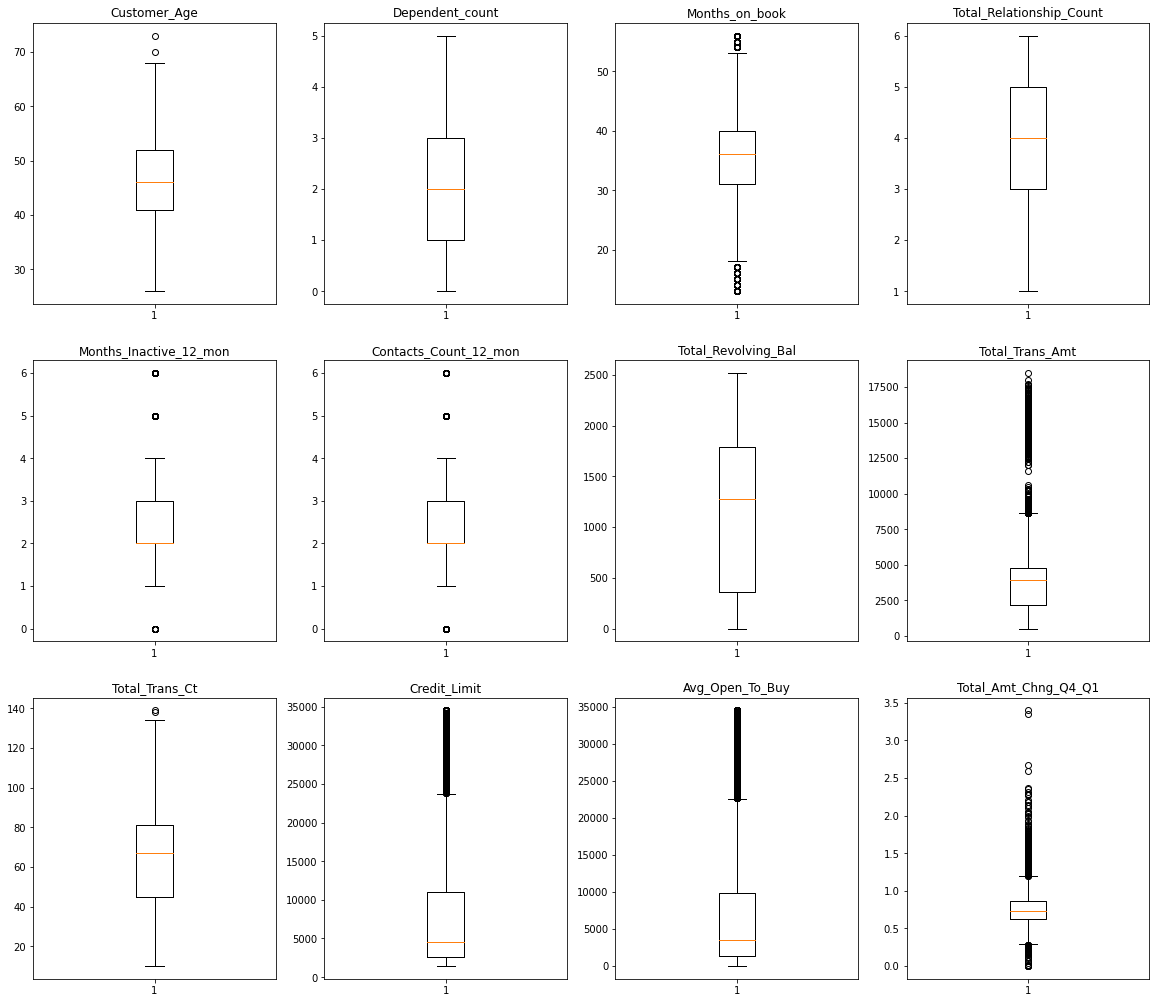

In [11]:
# Checking for Outliers on the numerical features:
# Creating a dictionary:

Numerics = {'Customer_Age': 1, 'Dependent_count': 2, 'Months_on_book': 3,'Total_Relationship_Count': 4,
              'Months_Inactive_12_mon': 5, 'Contacts_Count_12_mon': 6, 'Total_Revolving_Bal': 7,
              'Total_Trans_Amt': 8, 'Total_Trans_Ct': 9, 'Credit_Limit': 10, 'Avg_Open_To_Buy': 11, 'Total_Amt_Chng_Q4_Q1': 12 }

plt.figure(figsize=(20,30))

#Visualizing the Information on a boxplot:
for variable,i in Numerics.items():
  plt.subplot(5,4,i)
  plt.boxplot(Credit[variable])
  plt.title(variable)
plt.show()


Most of the Product Variables have existing Outliers.
 
Since there's no basis to assume the entries are not valid observations, no outliers are dropped.

**EXPLORATORY DATA ANALYSIS**

This analysis involves summarizing important characteristics and trends in the data to gain better understanding.

# 1. **Univariate Analysis**

Describing the data in terms of:

 - Total Customer Churn

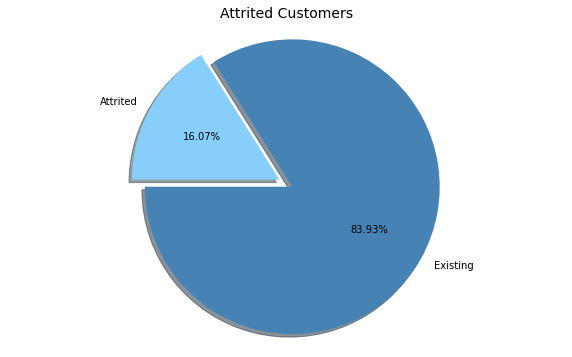

In [12]:
#Viewing the number of customers that attrited:
Churn = Credit['Attrition_Flag'].value_counts()
Churn
# Existing Customers: 8500    Attrited/Lost Customer:  1627

#Visualizing the information on a pie chart:
labels= ['Existing','Attrited']
colors=['steelblue', 'lightskyblue']
fontsize = 14
plt.figure(figsize= (10, 6))
plt.title("Attrited Customers", fontsize = fontsize)
plt.pie(Churn,labels=labels, colors=colors, startangle=180, shadow=True,explode=(0, 0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.show()


16% of the customers did not remain active customers.



**Demographic Information**

 - Gender 

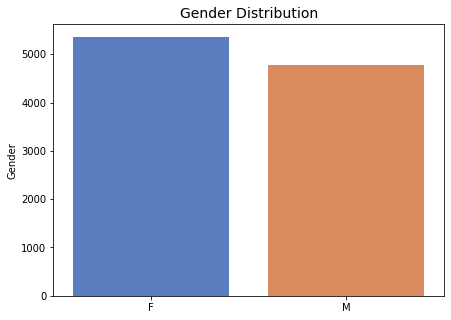

In [13]:
#To view the customers gender distribution:
Gender = Credit.Gender.value_counts()
Gender
# Males: 4,769 or 47%       Females: 5,358 or 53%

#Plotting observations:
plt.figure(figsize= (7,5))
fontsize = 14
plt.title("Gender Distribution", fontsize = fontsize)
sns.barplot(x=Gender.index, y=Gender, palette='muted');


In as much as majority of the customers are females, the distribution is relatively equal there being only around 6% more females than males.

 - Dependant Counts

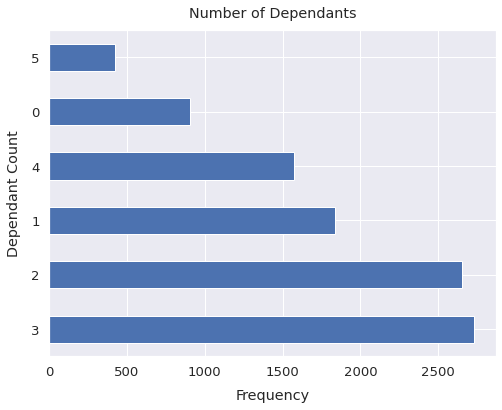

In [14]:
#Viewing the Number of Family members dependent on the customers:
sns.set(font_scale=1.2)
Credit['Dependent_count'].value_counts().plot(kind='barh', figsize=(8, 6), rot=0)
plt.xlabel("Frequency", labelpad=10)
plt.ylabel("Dependant Count", labelpad=10)
plt.title("Number of Dependants", y=1.02);


Most of the customers had 3 dependants.

 - Education

In [15]:
#Viewing the data in terms of the Level of education:
Education = Credit.Education_Level.value_counts()
Education


Graduate         4647
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

The main customer base are Graduates.


 - Age

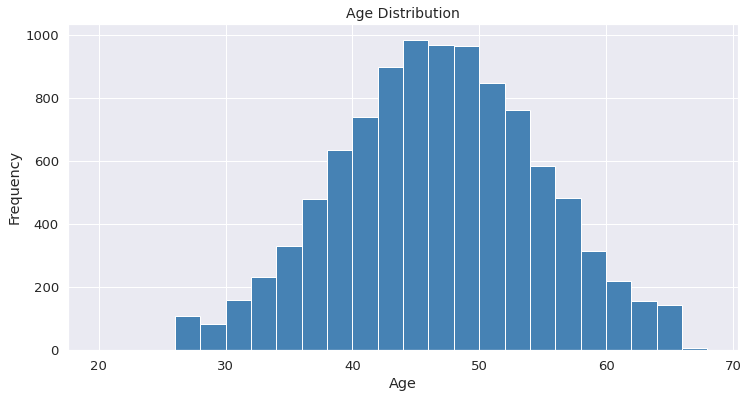

In [16]:
#Viewing the distribution of Customer Ages:
plt.figure(figsize= (12, 6))
fontsize = 14
plt.title('Age Distribution', fontsize = fontsize)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.hist(Credit.Customer_Age, bins= np.arange(20, 70, 2), color='steelblue', edgecolor='white');


Majority of the customers were aged between 40 to 50 years.


 - Income

In [17]:
#Viewing the popular Income category of the customers:
Credit['Income_Category'].value_counts(normalize=True)*100


Less than $40K    46.143972
$40K - $60K       17.675521
$80K - $120K      15.157500
$60K - $80K       13.844179
$120K +            7.178829
Name: Income_Category, dtype: float64

46% of the customers earned less than $40K.

 - Marital Status

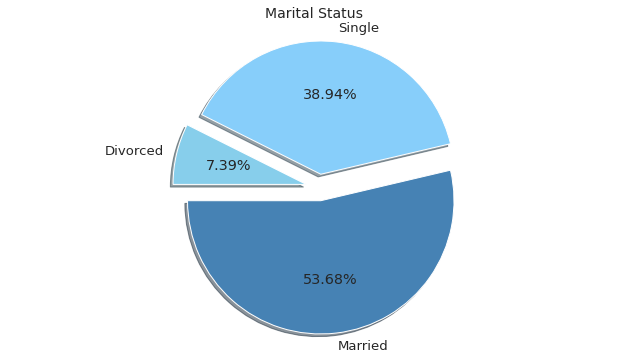

In [18]:
#Viewing the marital status of the customers:
Marital = Credit['Marital_Status'].value_counts()
Marital
# Married: 5,436    Single: 3,943   Divorced: 748

#Visualizing the information on a pie chart:
labels= ['Married','Single', 'Divorced']
colors=['steelblue', 'lightskyblue', 'skyblue']
fontsize = 14
plt.figure(figsize= (11, 6))
plt.title("Marital Status", fontsize = fontsize)
plt.pie(Marital,labels=labels, colors=colors, startangle=180, shadow=True,explode=(0.1, 0.1, 0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.show()

More than half of the bank customers were married.


**Product Information**

 -  Card Category

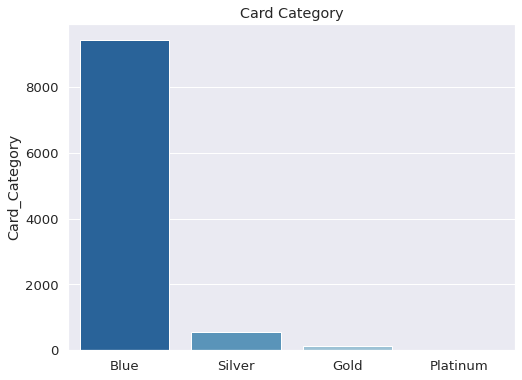

In [19]:
#To find out the most popular card category:
Card = Credit.Card_Category.value_counts().sort_values(ascending=False).head(5)
Card
#Blue - 9,436    Silver - 555    Gold - 116   Platinum - 20

#Plotting the Information:
plt.figure(figsize= (8,6))
plt.title('Card Category')
sns.barplot(x=Card.index, y=Card, palette='Blues_r');



Most customers used the Blue Credit Card.

While Credit Card hierarchy might be different across institutions, the different colours can give a general idea of the Card’s credit limit and rewards features list.

Being that most of the customers from the data sampled earned less than $40K, Blue can easily be identified as the Standard Card with Silver and Gold being more prestigious.

[Platinum](https://www.canstar.com.au/credit-cards/colour-credit-card-mean/) on the other hand is usually considered as the top-tier/most expensive card.



 - Descriptive Summary

In [20]:
#A Descriptive Summary of the numerical variables:
Credit.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


 - Looking at the information on:
   - **Months on Book**: The minimum and maximum number of months is 13 and 56 respectively. The model created therefore will be good at predicting customers who are at least 1 year 1 month old and not more than 5 years.
   - **Total Relationship Count**:  6 is the highest number of Accounts a Customer had with the bank while 1 is the lowest number. Further analysis can be done to establish if any relationship exists between total number of accounts and Churning.
   - **Months Inactive**: The least Number of months a Customer stayed without carrying out any transaction with the card was 0 while the most was 6. Exploring to be done on whether the more inactive a customer stays the likely they are to churn.
   - **Contacts Count**: 6 is the most Number of times a Customer had contacted the Company in the past 12 months. The more the contact, the more they are likely to churn since it could be a case of Customer disatisfaction.
   - **Total_Revolving_Bal**: This is the unpaid portion that carries over to the next month when the balance is not paid in full	

**Recommendation**:
- There being imbalance on the Target variable, techniques as SMOTE can be utilized for better model performance.

# 2. **Bivariate Analysis**

This analysis aims to determine whether a relationship exists between any two given variables.

 - **Customer Attrition and Demographic Information**

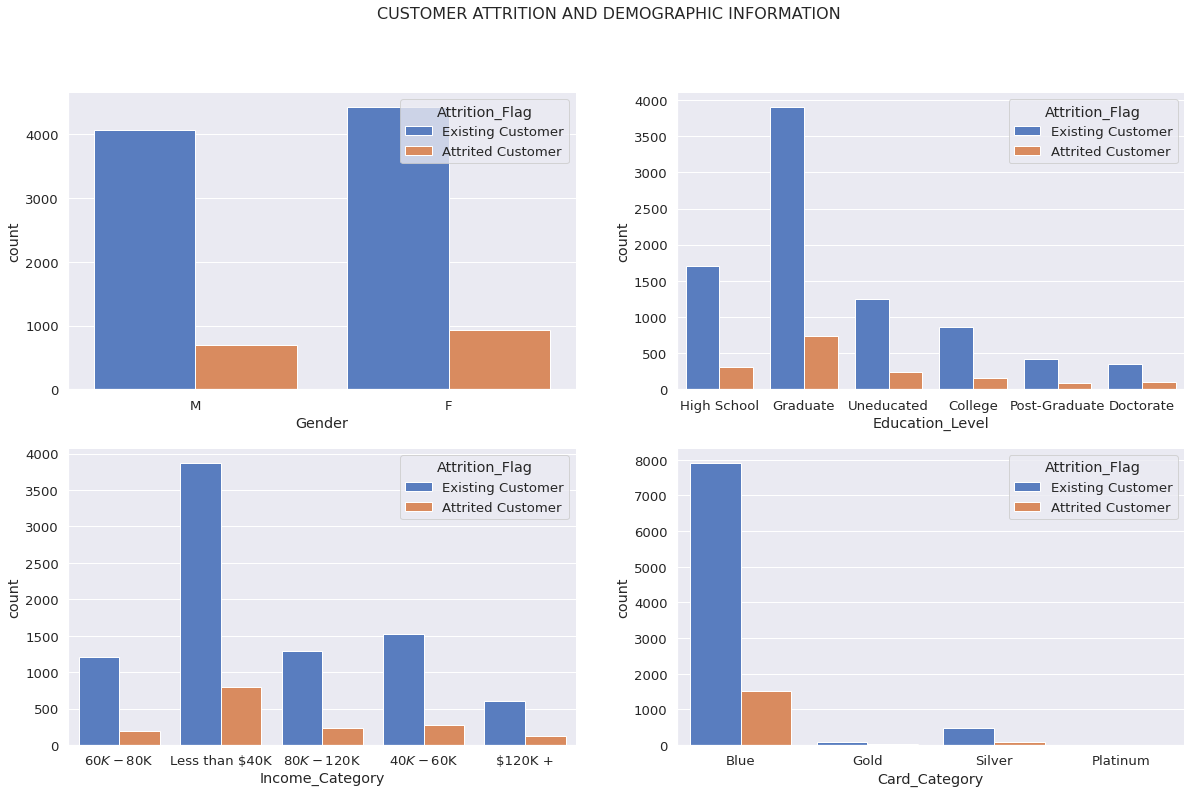

In [23]:
#Viewing the influence Demographic Information has on Customer Attrition:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
#Indicating the Title:
fig.suptitle('CUSTOMER ATTRITION AND DEMOGRAPHIC INFORMATION', fontsize = 16)
#Plotting the suplots:
sns.countplot(ax=axes[0, 0], data=Credit, x='Gender',hue='Attrition_Flag',palette='muted')
sns.countplot(ax=axes[0, 1], data=Credit, x='Education_Level',hue='Attrition_Flag',palette='muted')
sns.countplot(ax=axes[1, 0], data=Credit, x='Income_Category',hue="Attrition_Flag",palette='muted')
sns.countplot(ax=axes[1, 1], data=Credit, x='Card_Category',hue='Attrition_Flag',palette='muted')
sns.despine()

There appears to be no notable difference on Customer attrition with most of the demographics. 

The Customers likely to churn are; Graduates, those earning less than $40K and Blue Card users.  

- **Customer Attrition and Product Information**

Months on Books, Contact Counts, Total Relationship Count and Months Invactive 

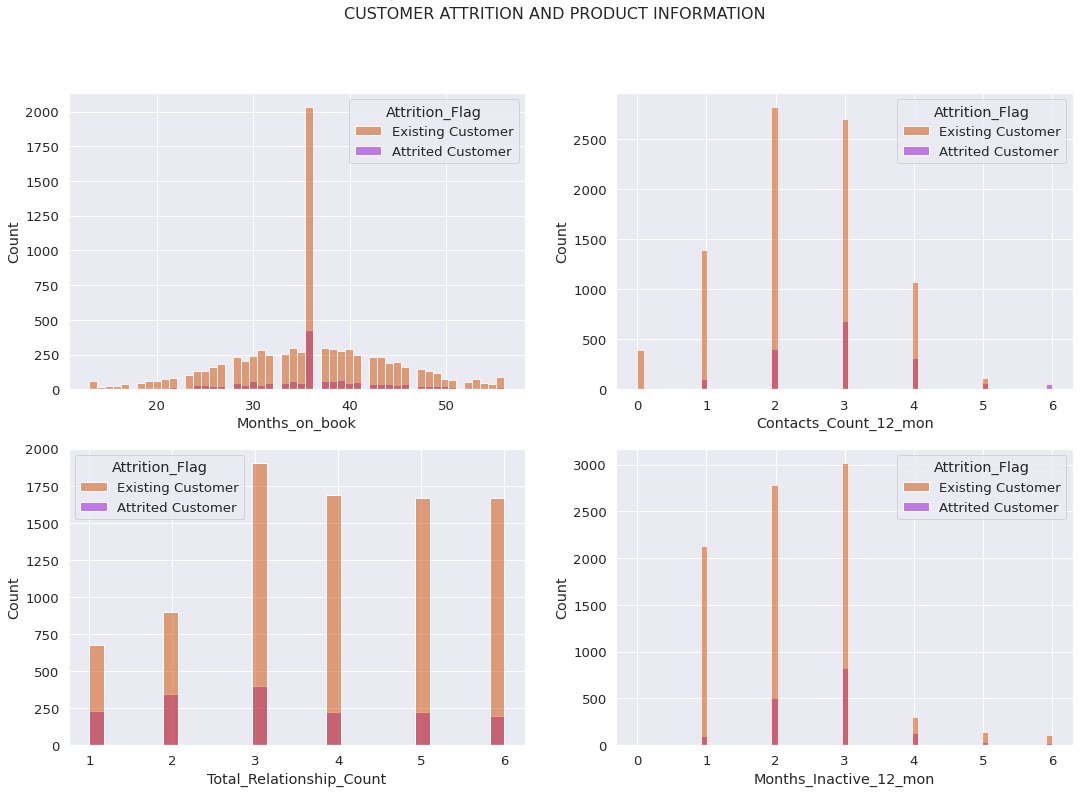

In [32]:
#Viewing the influence Months on Books, Contacts count, Total Relationship Count and Months Inactive has on Customer Attrition:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('CUSTOMER ATTRITION AND PRODUCT INFORMATION', fontsize = 16)
sns.histplot(ax=axes[0, 0], data =Credit, x='Months_on_book',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[1, 0], data=Credit, x='Total_Relationship_Count',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[1, 1], data=Credit, x='Months_Inactive_12_mon',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[0, 1], data=Credit, x='Contacts_Count_12_mon',hue='Attrition_Flag',palette='gnuplot_r');

 - Looking at the information on:
   - **Months on Book**: The minimum and maximum number of months is 13 and 56 respectively. The model created therefore will be good at predicting customers who are at least 1 year 1 month old and not more than 5 years.
   - **Contacts Count**: 6 is the most Number of times a Customer had contacted the Company in the past 12 months. The more the contact, the more they are likely to churn since it could be a case of Customer disatisfaction.
   - **Total Relationship Count**:  Customers who hold more Accounts/Products with the bank are not likely to churn. On the other hand stay with the bank while the customers holding fewer products churn
   
   6 is the highest number of Accounts a Customer had with the bank while 1 is the lowest number. Further analysis can be done to establish if any relationship exists between total number of accounts and Churning.
   - **Months Inactive**: Customers who tend to churn were more inactive in the last 12 months than the customers who do not churn

   The least Number of months a Customer stayed without carrying out any transaction with the card was 0 while the most was 6. Exploring to be done on whether the more inactive a customer stays the likely they are to churn.
   

Observations:
- **Months on Book**: Majority of the Customers have held their Cards for 36 months/ 3 years. 
 Customers who had been on the books of the bank in the past 12 months.
- Customers who had contacted the Bank 6 times Churned. All those who had not contacted the Bank are all existing customers.
- Customers who had

- Users that had less products/relationship were most likely to churn
- A user who had been inactive for longer periods of time was most likely to churn
-Users who had more contacts were likely
- 


Credit Limit, Total Revolving Balance, Total Trans Ct, Total_Trans_Amt, Total_Amt_Chng_Q4_Q1 and Avg_Utilization_Ratio:

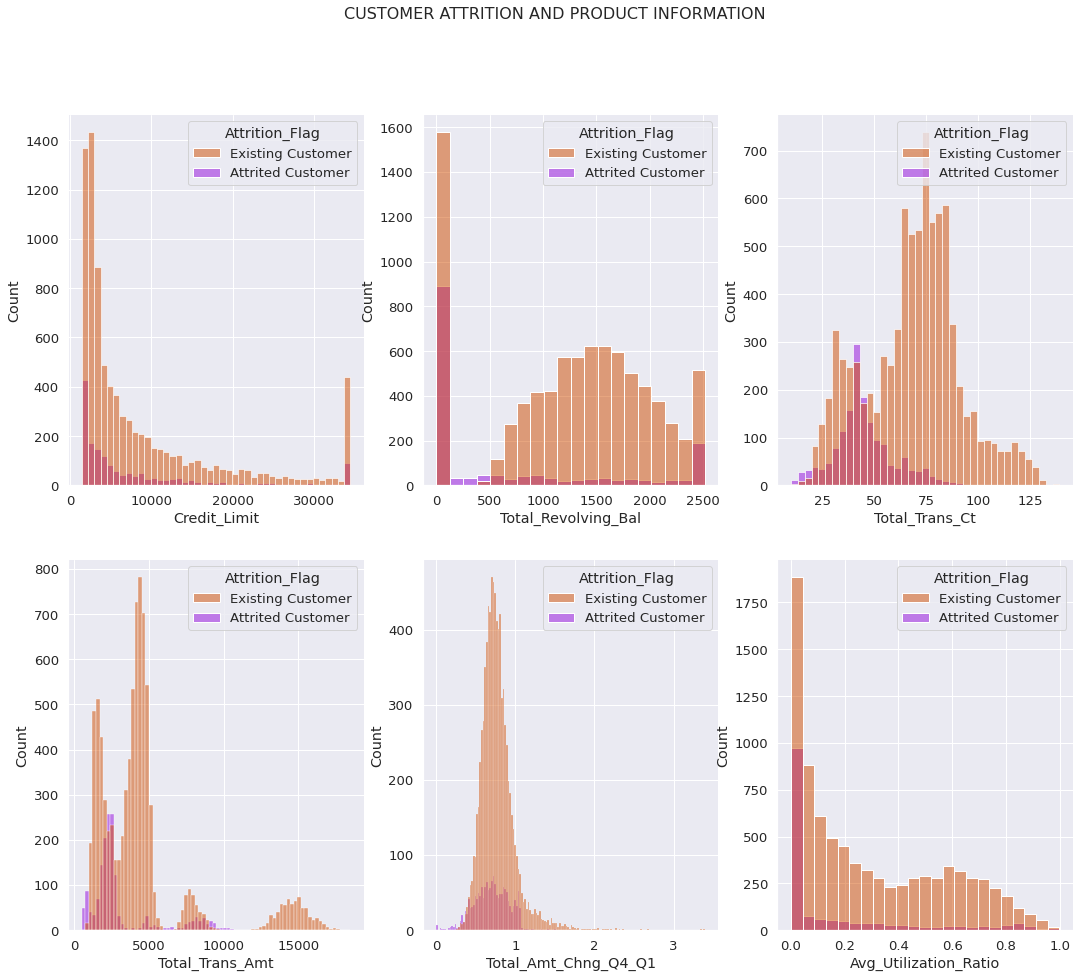

In [25]:
#Viewing the influence Credit Limit, Total Revolving Balance, Total Trans Ct, 
#Total_Trans_Amt, Total_Amt_Chng_Q4_Q1 and Avg_Utilization_Ratio has on Customer Attrition:
fig, axes = plt.subplots(2, 3, figsize=(18, 15))
fig.suptitle('CUSTOMER ATTRITION AND PRODUCT INFORMATION', fontsize = 16)
sns.histplot(ax=axes[0, 0], data =Credit, x='Credit_Limit',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[0, 1], data=Credit, x='Total_Revolving_Bal',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[0, 2], data=Credit, x='Total_Trans_Ct',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[1, 0], data=Credit, x='Total_Trans_Amt',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[1, 1], data =Credit, x='Total_Amt_Chng_Q4_Q1',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[1, 2], data=Credit, x='Avg_Utilization_Ratio',hue='Attrition_Flag',palette='gnuplot_r')
sns.despine()

Observations:
- **Credit Limit**: 
- **Total Revolving Bal**: Customers that had a lower revolving balance were the most likely to leave. Customers that owe less to the institution: Customers that have a lower revolving balance have a greater chance to leave the organization. This is something interesting since what we would like to have are customers that owe less to the institution.
- **Total Trans Ct**:Customers who churn make fewer transactions using the bank's card than the customers stay with the bank

 When total transaction counts are less than 45 we see that there is a greater chance that the individual will leave the organization meaning that levels of inactivity can be a risk for a customer to leave the organization.
- **Total Trans Amt**: Churning customers spend lesser than non churning customers
- **Total Amt Chng Q4 Q1**:
- **Avg Utilization Ratio**: 
- Low levels of inactivity: If the transaction count is less than 0.582 it is most likely that the customer will leave. 
- Total transaction count if it is less than 45 for a specific client then the client is more likely to leave the organization
- **Transaction Amount**: The lower the transaction amounts the higher the correlation with attrition.
- **Average Open to Buy**: 




 - Correlation Test

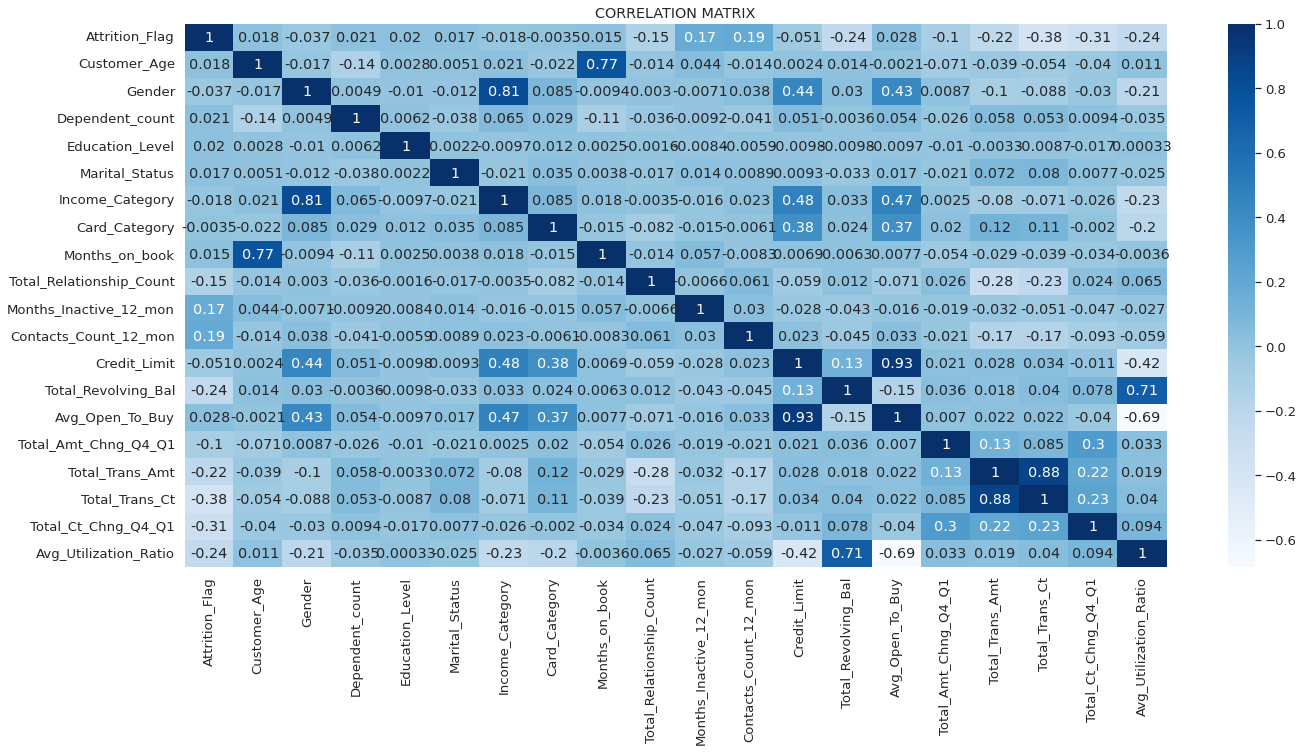

In [31]:
#To check for correlation between the variables:
plt.figure(figsize = (22, 10))
Corr = Model.corr(method = 'spearman')
sns.heatmap(Corr, cmap = 'Blues', annot = True)
plt.title('CORRELATION MATRIX', y=1.5)
plt.show()


Summary:
- A perfect positive relationship exists between Average Open to Buy and Credit Limit.
- A strong positive relationship of 0.8 exists between Total Transaction Amount and Total Transaction Count.
- Customer Age and Months on Book have a positive relationship of 0.79
- A moderate positive relationship of 0.6 exists between Average Utilization Ratio and Total Revolving Balance.

Obviously Total_Trans_Amt and Total_Amt_Chng_Q4_Q1 are highly correlated as they are interrelated, same for Total_Trans_Ct/Total_Ct_Chng_Q4_Q1

**Observations:**
- only 16% of the data samples represent churn customers; in the following steps, I will use SMOTE to upsample the churn samples to match them with the regular customer sample size to give the later selected models a better chance of catching on small details which will almost definitely be missed out with such a size difference.


**MODELLING**

Precision and recall are metrics that are commonly used for classification problems. 

Precision: This is the ratio of true positives against all positives. In this case, a positive will be the customers leaving the organization. A True positive will be a correct prediction by our model that a customer is leaving the organization and a false positive will be our model predicting incorrectly that a customer will be leaving.

Recall: is a metric of our model correctly identifying True positives (in other words customers leaving the organization.) The recall is basically the ratio of how many customers did our model predict correctly from the total customers within the institution.


Showcasing Feature Importance
Now it is time to better understand our model. We would want to understand what factors drive our model to make certain predictions. In this case what factors make our model determine whether a customer will leave the organization? In order to know this we need to understand which features are important to our model.

mportant features: The features that our model considers the most important in determining whether a customer will leave the organization include: Total Transaction Amount, Total transaction count and total revolving balance.
Total transaction Count: When the total amount of transactions gets lower than 45 transactions it is most likely that the customer will leave the organization.


In [50]:
#Creating the modelling dataframe:
Model = Credit.copy()
Model.head(4)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760


**Feature Engineering**

Label Encoding

In [51]:
#Encoding the Categorical Variables to a machine readable format:
#1. Ordinal and Binary Columns:
Model.replace({'Education_Level': {'Uneducated': 0, 'High School': 1, 'College':2, 'Graduate': 3, 'Post-Graduate': 4, 'Doctorate': 5},
               'Income_Category': {'Less than $40K': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, '$120K +':4},
               'Attrition_Flag': {'Existing Customer': 0, 'Attrited Customer': 1},
               'Gender': {'M': 1, 'F': 0}}, inplace = True)

#2. Nominal Columns:
Nominal = ['Marital_Status', 'Card_Category']

for i in Nominal:
  Model[i] = LabelEncoder().fit_transform(Model[i])

#Viewing the Dataset:
Model.head(4)


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,1,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,3,2,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,3,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,1,1,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760


**Multicollinearity**

Occurs when the model includes multiple factors that are correlated to each other.

In [52]:
# Using the Variance Inflaction Factor to check for multicollinearity:

Independents = Model[['Customer_Age', 'Gender','Dependent_count', 'Education_Level', 'Marital_Status',
                       'Income_Category', 'Card_Category','Months_on_book','Total_Relationship_Count', 
                       'Months_Inactive_12_mon','Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Credit_Limit',
                       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
                       'Total_Trans_Ct']]
  
# Creating the VIF dataframe:
vif_data = pd.DataFrame()
vif_data["feature"] = Independents.columns
  
#Calculating the VIF for each feature:
vif_data["VIF"] = [variance_inflation_factor(Independents.values, i)
                       for i in range(len(Independents.columns))]
vif_data.round(2)


,feature,VIF
0,Customer_Age,76.52
1,Gender,5.16
2,Dependent_count,4.10
3,Education_Level,3.58
4,Marital_Status,5.60
5,Income_Category,5.76
6,Card_Category,1.50
7,Months_on_book,56.44
8,Total_Relationship_Count,7.54
9,Months_Inactive_12_mon,6.12


VIF = 1 shows no correlation between the independent variable and the other variables.

VIF < 5 shows moderate correlation.

VIF > 5 indicate a high multicollinearity between the independent variables and others.

The inf(infinity) shows a perfect correlation between 2 independent variables. 

From the results above, multicolinearity is present. Algorithms likely to be affected are Logistic, KNN and Naive Bayes. Regularization during training shall be employed on the Logistic Model.

Feature Scaling

In [55]:
#Performing scaling on the Independent variables:
sc = MinMaxScaler()
Feature_Sc = ['Customer_Age', 'Gender','Dependent_count', 'Education_Level', 'Marital_Status',
                       'Income_Category', 'Card_Category','Months_on_book','Total_Relationship_Count', 
                       'Months_Inactive_12_mon','Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Credit_Limit',
                       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
                       'Total_Trans_Ct']

Model[Feature_Sc] = sc. fit_transform(Model[Feature_Sc])
Model.head(4)


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,0.404255,1.0,0.6,0.2,0.5,0.50,0.0,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061
1,0,0.489362,0.0,1.0,0.6,1.0,0.00,0.0,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105
2,0,0.531915,1.0,0.6,0.6,0.5,0.75,0.0,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000
3,0,0.297872,0.0,0.8,0.2,0.5,0.00,0.0,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760761


**Model Training**

**No Sampling**

Training the model with the Imbalanced data:

- **Logistic Regression** {Baseline Model}

In [56]:
#Separating the Features and Target:
X = Model.drop('Attrition_Flag', axis=1)
y = Model['Attrition_Flag']

#Splitting the data into training and test data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 2)


Building the Regression model

In [57]:
#Model Selection without any hyperparameters:
Log = LogisticRegression()

#Fitting the model:
Log.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Log.predict(X_test)


Performance Evaluation

In [58]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Log.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Log.score(X_test, y_test):.2f}')


Train Accuracy: 0.90
Test Accuracy: 0.90


The Training and Test set accuracy are very much comparable.

Since the model is doing better on both the training and test set, there's no case of Over or Underfitting

In [59]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', precision_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1714
           1       0.79      0.52      0.62       312

    accuracy                           0.90      2026
   macro avg       0.85      0.75      0.78      2026
weighted avg       0.90      0.90      0.90      2026

Precision Score:  0.79
Recall Score:  0.79
F1 Score:  0.62


In [60]:
#Using confusion matrix:
confusion_matrix(y_test, y_pred)


array([[1671,   43],
       [ 151,  161]])

**Hyperparameter Optimization**

In [63]:
#Choosing optimal parameters:
model = LogisticRegression()
param_grid = [{'penalty': ['l1', 'l2'], 
               'C': np.logspace(0, 4, 5),
               'solver' : ['lbfgs', 'newton-cg', 'liblinear','saga'],
               'max_iter' : [5, 10]
               }
              ]

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(model, param_grid = param_grid, cv=5, verbose=0, scoring = 'accuracy')

# Fitting grid search
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

In [64]:
#Checking the best hyperparameters:
print('Best Penalty:', best_clf.best_estimator_.get_params()['penalty'])
print('Best C:', best_clf.best_estimator_.get_params()['C'])
print('Best Solver:', best_clf.best_estimator_.get_params()['solver'])
print('Best max_iter:', best_clf.best_estimator_.get_params()['max_iter'])

Best Penalty: l2
Best C: 100.0
Best Solver: saga
Best max_iter: 10


In [65]:
#Model Selection using the Above parameters:
model = LogisticRegression(penalty='l2', C=100.0, max_iter=10, solver='saga')

#Fitting the model:
model.fit(X_train,y_train )

LogisticRegression(C=100.0, max_iter=10, solver='saga')

In [66]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', precision_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1714
           1       0.73      0.57      0.64       312

    accuracy                           0.90      2026
   macro avg       0.83      0.77      0.79      2026
weighted avg       0.90      0.90      0.90      2026

Precision Score:  0.73
Recall Score:  0.73
F1 Score:  0.64


The Recall score of the Attrited Class after Tuning improved to 57% from 52%

**HANDLING CLASS IMBALANCE**

**Oversampling**
 - This involves increasing the number of samples in the minority class to match up to the number of samples in the majority class.
 - This ensures the algorithm does not end up learning the majority class better and not understanding the minority class.
 

1. **LOGISTIC REGRESSION**

In [67]:
#Using the SMOTE technique to increase samples of churned customers:
Smote = SMOTE(random_state = 42)
X_smote, y_smote = Smote.fit_resample(X_train, y_train)

In [68]:
#Model Selection:
Log = LogisticRegression()

#Fitting the model:
Log.fit(X_smote, y_smote)

#Applying the trained model to make a prediction:
y_pred = Log.predict(X_test)

In [69]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Log.score(X_smote, y_smote):.2f}')
print(f'Test Accuracy: {Log.score(X_test, y_test):.2f}')


Train Accuracy: 0.86
Test Accuracy: 0.85


In [70]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', precision_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1714
           1       0.50      0.85      0.63       312

    accuracy                           0.85      2026
   macro avg       0.73      0.85      0.77      2026
weighted avg       0.90      0.85      0.86      2026

Precision Score:  0.5
Recall Score:  0.5
F1 Score:  0.63


The recall of the Attrited Customers with the imbalanced data after tuning was 57%. After performing oversampling, the recall improved to 85%.

This means that the model predicts 85% of the attrited customers accurately.

2. **DECISION TREES**

No Sampling

In [71]:
#Model Selection:
Decision = DecisionTreeClassifier()

#Fitting the model:
Decision.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Decision.predict(X_test)


In [72]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Decision.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Decision.score(X_test, y_test):.2f}')

Train Accuracy: 1.00
Test Accuracy: 0.94


In [73]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', precision_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1714
           1       0.82      0.81      0.81       312

    accuracy                           0.94      2026
   macro avg       0.89      0.89      0.89      2026
weighted avg       0.94      0.94      0.94      2026

Precision Score:  0.82
Recall Score:  0.82
F1 Score:  0.81


Oversampling

In [74]:
#Model Selection:
Decision = DecisionTreeClassifier()

#Fitting the model:
Decision.fit(X_smote, y_smote)

#Applying the trained model to make a prediction:
y_pred = Decision.predict(X_test)

In [32]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Decision.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Decision.score(X_test, y_test):.2f}')

Train Accuracy: 1.00
Test Accuracy: 0.92


In [33]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', precision_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1714
           1       0.71      0.83      0.76       312

    accuracy                           0.92      2026
   macro avg       0.84      0.88      0.86      2026
weighted avg       0.93      0.92      0.92      2026

Precision Score:  0.71
Recall Score:  0.71
F1 Score:  0.76


**KNN Classifier**

In [ ]:
#Model Selection :
Knn = KNeighborsClassifier(n_neighbors=1)

#Fitting the model:
Knn.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Knn.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Knn.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Knn.score(X_test, y_test):.2f}')

Train Accuracy: 0.99
Test Accuracy: 0.75


The model is doing much better on the training set than on the test set hence there's overfitting.

In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', precision_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       100
           1       0.72      0.71      0.71        79

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179

Precision Score:  0.72
Recall Score:  0.72
F1 Score:  0.71


The baseline precision and recall scores perform better compared to the Knn before optimization

In [ ]:
#Using confusion matrix:
print(confusion_matrix(y_test, y_pred))


[[78 22]
 [23 56]]


**Hyperparameter Optimization**

Checking the best value of K

In [ ]:
#To find the best K for the train and test data:
training_accuracy =[]
test_accuracy =[]

neighbors = range(1, 15)
for numbers in neighbors:
  KNN = KNeighborsClassifier(n_neighbors= numbers)
  KNN.fit(X_train, y_train)
  training_accuracy.append(KNN.score(X_train, y_train))
  test_accuracy.append(KNN.score(X_test, y_test))

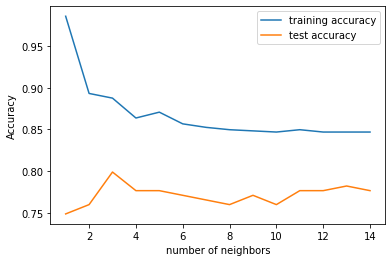

In [ ]:
#Plotting the calculated accuracy levels:
plt.plot(neighbors,training_accuracy, label = 'training accuracy')
plt.plot(neighbors,test_accuracy, label = 'test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('number of neighbors')
plt.legend()

From the plot, at no point does the train and test accuracies approach each other. With this a range for the K's will be set to assess the best K value

In [ ]:
#To view the parameters available for tuning in the KNN classifier:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
#Creating the parameter grid:
param_grid = {'n_neighbors' : [3, 5, 7, 9, 10, 15, 20, 21],
              'weights' : ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski'],
              'algorithm' : ['auto', 'ball_tree','kd_tree', 'brute'],
              'p' : [1,2]}


In [ ]:
#Using the classifier along with grid search:
knn = KNeighborsClassifier()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(knn, param_grid = param_grid, cv= 10, verbose = True, n_jobs = 1, scoring = 'accuracy' )

#Fitting the grid search:
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)


Fitting 10 folds for each of 384 candidates, totalling 3840 fits


If the K value comes to be odd then it’s all right else we make it odd by adding 1 to it.

In [ ]:
#To view the best parameters:
best_clf.best_params_


{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 10,
 'p': 1,
 'weights': 'uniform'}

Building the Model with the best estimators

In [ ]:
#Using the best parameters from hyperparameter tuning:
Final_knn = KNeighborsClassifier(algorithm = 'auto', metric = 'manhattan',
                               n_neighbors = 11, p = 1, weights = 'uniform')

#Fitting the model:
Final_knn.fit(X_train,y_train )

#Predicting values:
Y_pred = Final_knn.predict(X_test)

Performance Evaluation

In [ ]:
#Checking the Accuracy:
print(f'Train Accuracy: {Final_knn.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Final_knn.score(X_test, y_test):.2f}')

Train Accuracy: 0.85
Test Accuracy: 0.79


In [ ]:
#Checking the classification report:
print(classification_report(y_test, Y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, Y_pred).round(2))
print('Recall Score: ', precision_score(y_test, Y_pred).round(2))
print('F1 Score: ', f1_score(y_test, Y_pred).round(2))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       100
           1       0.85      0.63      0.72        79

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.78       179

Precision Score:  0.85
Recall Score:  0.85
F1 Score:  0.72


In [ ]:
#Using confusion matrix:
print(confusion_matrix(y_test, Y_pred))

[[91  9]
 [29 50]]


**Observations:**

- The classifier made a total of 179 predictions.
- Out of the 179 cases, the classifier predicted did not survive 59 times and survived 120 times. In reality, there were 100 Did not survive cases and 79 survived cases.
- There were 50 true negatives and 91 true positives( cases where actual and predicted values are yes).
- There were 9 false positives and 29 false negatives. These are the total misclassifications.
- The true positive rate/recall score is 0.85. An improvement from 0.72 before tuning is performed.


**Partitioning: 70 - 30**

**Baseline Model**

In [ ]:
#Creating the Variables:
X = Model.drop('Survived', axis=1)
y = Model['Survived']

#Splitting the data into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 0)

#Printing the Shapes of the split data:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (623, 7)
y_train : (623,)
X_test : (268, 7)
y_test : (268,)


In [ ]:
#Model Selection without any hyperparameters:
Log2 = LogisticRegression()

#Fitting the model:
Log2.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Log2.predict(X_test)

Performance Evaluation

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Log2.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Log2.score(X_test, y_test):.2f}')

Train Accuracy: 0.80
Test Accuracy: 0.79


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', precision_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       168
           1       0.73      0.72      0.72       100

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

Precision Score:  0.73
Recall Score:  0.73
F1 Score:  0.72


In [ ]:
#Using confusion matrix:
print(confusion_matrix(y_test, y_pred))

[[141  27]
 [ 28  72]]


Comparing performance to the 80-20 split, the precision and recall scores dropped from 0.81 to 0.73.

The accuracy on the other hand improved from 77% to 79%

**KNN Classifier**

In [ ]:
#Model Selection :
Knn2 = KNeighborsClassifier(n_neighbors=1)

#Fitting the model:
Knn2.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Knn2.predict(X_test)

Model Performance

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Knn2.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Knn2.score(X_test, y_test):.2f}')

Train Accuracy: 0.98
Test Accuracy: 0.76


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', precision_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       168
           1       0.69      0.68      0.68       100

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268

Precision Score:  0.69
Recall Score:  0.69
F1 Score:  0.68


In [ ]:
#Using confusion matrix:
print(confusion_matrix(y_test, y_pred))

[[137  31]
 [ 32  68]]


Comparing to the first partitioning, the recall and precision scores dropped from 0.72 to 0.69.


**Hyperparameter Optimization**

Checking the best value of K

In [ ]:
#To find the best K for the train and test data:
training_accuracy =[]
test_accuracy =[]

neighbors = range(1, 15)
for numbers in neighbors:
  KNN = KNeighborsClassifier(n_neighbors= numbers)
  KNN.fit(X_train, y_train)
  training_accuracy.append(KNN.score(X_train, y_train))
  test_accuracy.append(KNN.score(X_test, y_test))

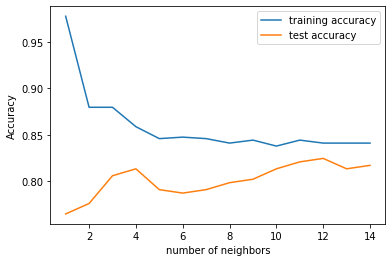

In [ ]:
#Plotting the calculated accuracy levels:
plt.plot(neighbors,training_accuracy, label = 'training accuracy')
plt.plot(neighbors,test_accuracy, label = 'test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('number of neighbors')
plt.legend()

The Test and Train accuracy seem to be closest when the K is 12. During tuning, the range will be set around that value

In [ ]:
#Creating the parameter grid:
param_grid = {'n_neighbors' : [4, 11, 12, 13, 14, 16],
              'weights' : ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski'],
              'algorithm' : ['auto', 'ball_tree','kd_tree', 'brute'],
              'p' : [1,2]}

In [ ]:
#Using the classifier along with grid search:
knn = KNeighborsClassifier()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(knn, param_grid = param_grid, cv= 10, verbose = True, n_jobs = 1, scoring = 'accuracy' )

#Fitting the grid search:
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


In [ ]:
#To view the best parameters:
best_clf.best_params_

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_neighbors': 14,
 'p': 1,
 'weights': 'uniform'}

Building the model with the best estimators

In [ ]:
#Using the best parameters from hyperparameter tuning:
Final_knn2 = KNeighborsClassifier(algorithm = 'auto', metric = 'euclidean',
                               n_neighbors = 15, p = 1, weights = 'uniform')

#Fitting the model:
Final_knn2.fit(X_train,y_train )

#Predicting values:
Y_pred = Final_knn2.predict(X_test)

Model Evaluation

In [ ]:
#Checking the Accuracy:
print(f'Train Accuracy: {Final_knn2.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Final_knn2.score(X_test, y_test):.2f}')

Train Accuracy: 0.84
Test Accuracy: 0.82


In [ ]:
#Checking the classification report:
print(classification_report(y_test, Y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, Y_pred).round(2))
print('Recall Score: ', precision_score(y_test, Y_pred).round(2))
print('F1 Score: ', f1_score(y_test, Y_pred).round(2))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       168
           1       0.79      0.69      0.74       100

    accuracy                           0.82       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.82      0.82      0.81       268

Precision Score:  0.79
Recall Score:  0.79
F1 Score:  0.74


In [ ]:
#Using confusion matrix:
print(confusion_matrix(y_test, Y_pred))

[[150  18]
 [ 31  69]]


**Observations:**

- The classifier made a total of 268 predictions.
- There were 69 true negatives( cases where the actual and predicted values are no) and 150 true positives
- There were 18 false positives and 31 false negatives. These are the total misclassifications.
- The true positive rate/recall score is 0.79 a drop from the first partitioning.

**Partitioning: 60 - 40**

**Baseline Model**

In [ ]:
#Creating the Variables:
X = Model.drop('Survived', axis=1)
y = Model['Survived']

#Splitting the data into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state= 0)

#Printing the Shapes of the split data:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (534, 7)
y_train : (534,)
X_test : (357, 7)
y_test : (357,)


In [ ]:
#Model Selection without any hyperparameters:
Log3 = LogisticRegression()

#Fitting the model:
Log3.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Log3.predict(X_test)

Performance Evaluation

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Log3.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Log3.score(X_test, y_test):.2f}')

Train Accuracy: 0.81
Test Accuracy: 0.80


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', precision_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       221
           1       0.76      0.68      0.72       136

    accuracy                           0.80       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.80      0.80      0.80       357

Precision Score:  0.76
Recall Score:  0.76
F1 Score:  0.72


In [ ]:
#Using confusion matrix:
print(confusion_matrix(y_test, y_pred))

[[192  29]
 [ 43  93]]


Compared to the first 2 partitionings, the accuracy score is doing better with 80%

The precision and recall score is better than the 70-30 split

**KNN Classifier**

In [ ]:
#Model Selection before tuning :
Knn3 = KNeighborsClassifier(n_neighbors=1)

#Fitting the model:
Knn3.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Knn3.predict(X_test)

Performance

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Knn3.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Knn3.score(X_test, y_test):.2f}')

Train Accuracy: 0.98
Test Accuracy: 0.74


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', precision_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       221
           1       0.65      0.66      0.66       136

    accuracy                           0.74       357
   macro avg       0.72      0.72      0.72       357
weighted avg       0.74      0.74      0.74       357

Precision Score:  0.65
Recall Score:  0.65
F1 Score:  0.66


In [ ]:
#Using confusion matrix:
print(confusion_matrix(y_test, y_pred))

[[173  48]
 [ 46  90]]


**Hyperparameter Optimization**

Checking the best value of K

In [ ]:
#To find the best K for the train and test data:
training_accuracy =[]
test_accuracy =[]

neighbors = range(1, 20)
for numbers in neighbors:
  KNN = KNeighborsClassifier(n_neighbors= numbers)
  KNN.fit(X_train, y_train)
  training_accuracy.append(KNN.score(X_train, y_train))
  test_accuracy.append(KNN.score(X_test, y_test))

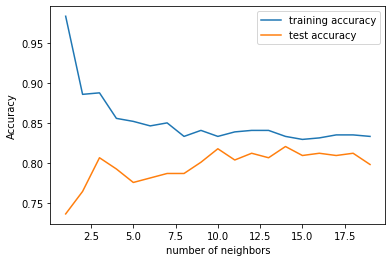

In [ ]:
#Plotting the calculated accuracy levels:
plt.plot(neighbors,training_accuracy, label = 'training accuracy')
plt.plot(neighbors,test_accuracy, label = 'test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('number of neighbors')
plt.legend()

The Test and Train accuracy seem to be closest when the K is between 12 and 16. During tuning, the range will be set around those value

In [ ]:
#Creating the parameter grid:
param_grid = {'n_neighbors' : [10, 11, 12, 13, 14, 15, 16],
              'weights' : ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski'],
              'algorithm' : ['auto', 'ball_tree','kd_tree', 'brute'],
              'p' : [1,2]}

In [ ]:
#Using the classifier along with grid search:
knn = KNeighborsClassifier()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(knn, param_grid = param_grid, cv= 10, verbose = True, n_jobs = 1, scoring = 'accuracy' )

#Fitting the grid search:
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

Fitting 10 folds for each of 336 candidates, totalling 3360 fits


Best Parameters

In [ ]:
#To view the best parameters:
best_clf.best_params_

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_neighbors': 15,
 'p': 1,
 'weights': 'uniform'}

In [ ]:
#Using the best parameters from hyperparameter tuning:
Final_knn3 = KNeighborsClassifier(algorithm = 'auto', metric = 'euclidean',
                               n_neighbors = 15, p = 1, weights = 'uniform')

#Fitting the model:
Final_knn3.fit(X_train,y_train )

#Predicting values:
Y_pred = Final_knn3.predict(X_test)

In [ ]:
#Checking the Accuracy:
print(f'Train Accuracy: {Final_knn3.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Final_knn3.score(X_test, y_test):.2f}')

Train Accuracy: 0.83
Test Accuracy: 0.81


In [ ]:
#Checking the classification report:
print(classification_report(y_test, Y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, Y_pred).round(2))
print('Recall Score: ', precision_score(y_test, Y_pred).round(2))
print('F1 Score: ', f1_score(y_test, Y_pred).round(2))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       221
           1       0.79      0.68      0.73       136

    accuracy                           0.81       357
   macro avg       0.81      0.78      0.79       357
weighted avg       0.81      0.81      0.81       357

Precision Score:  0.79
Recall Score:  0.79
F1 Score:  0.73


In [ ]:
#Using confusion matrix:
print(confusion_matrix(y_test, Y_pred))

[[197  24]
 [ 44  92]]


**Observations:**

- The classifier made a total of 357 predictions.
- There were 92 true negatives and 197 true positives.
- There were 24 false positives and 44 false negatives. These are the total misclassifications.
- The true positive rate/recall score is 0.79.

# **Performance Analysis**

**Assessing Accuracy**

- When the K value is small it causes Low Bias and High variance leading to overfitting of the model. This explains why before optimization  on the KNN classifier, since the K value was set at 1 the train and test accuracies were incomparable. In all the 3 splits, the best K was an odd number, 5 and 15 for the last 2 splits 
- Comparing the Precision and Recall scores, the 80-20 split had the best scores of 0.85 making it the preferred model. The other 2 had scores of 0.79. The closer this scores are to 1, the better the model.
- Since feature importance is not direct for the KNN algorithm, there's no easy way to compute the features responsible for the classification.
- Adding training data to the model did not improve the accuracy scores rather the precision and recall scores improved. As its instance based, it adapts as new data is collected. To improve scores, a preprocessing stage can be added.

**Conclusions**


- Since KNN relies on computing distances, feature scaling before running the model is important. Features with a higher scale can have higher calculated distances and might produce poor results.
- To improve the classifier:
 - Dimensionality reduction can be performed since KNN performs best with a low number of features. Eg: Performing LDA
 - The outlier in the fare column can be dropped during preprocessing.  Since the model is sensitive to outliers, it simply chooses the neighbors based on distance criteria.